# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [1]:
import numpy as np
class LinearRegression:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr* db

    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        # print(self.weights, self.bias)
        return y_predicted


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('Real estate.csv')
df.head()

C:\Users\Arsh\AppData\Local\Temp\ipykernel_28496\3118353983.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

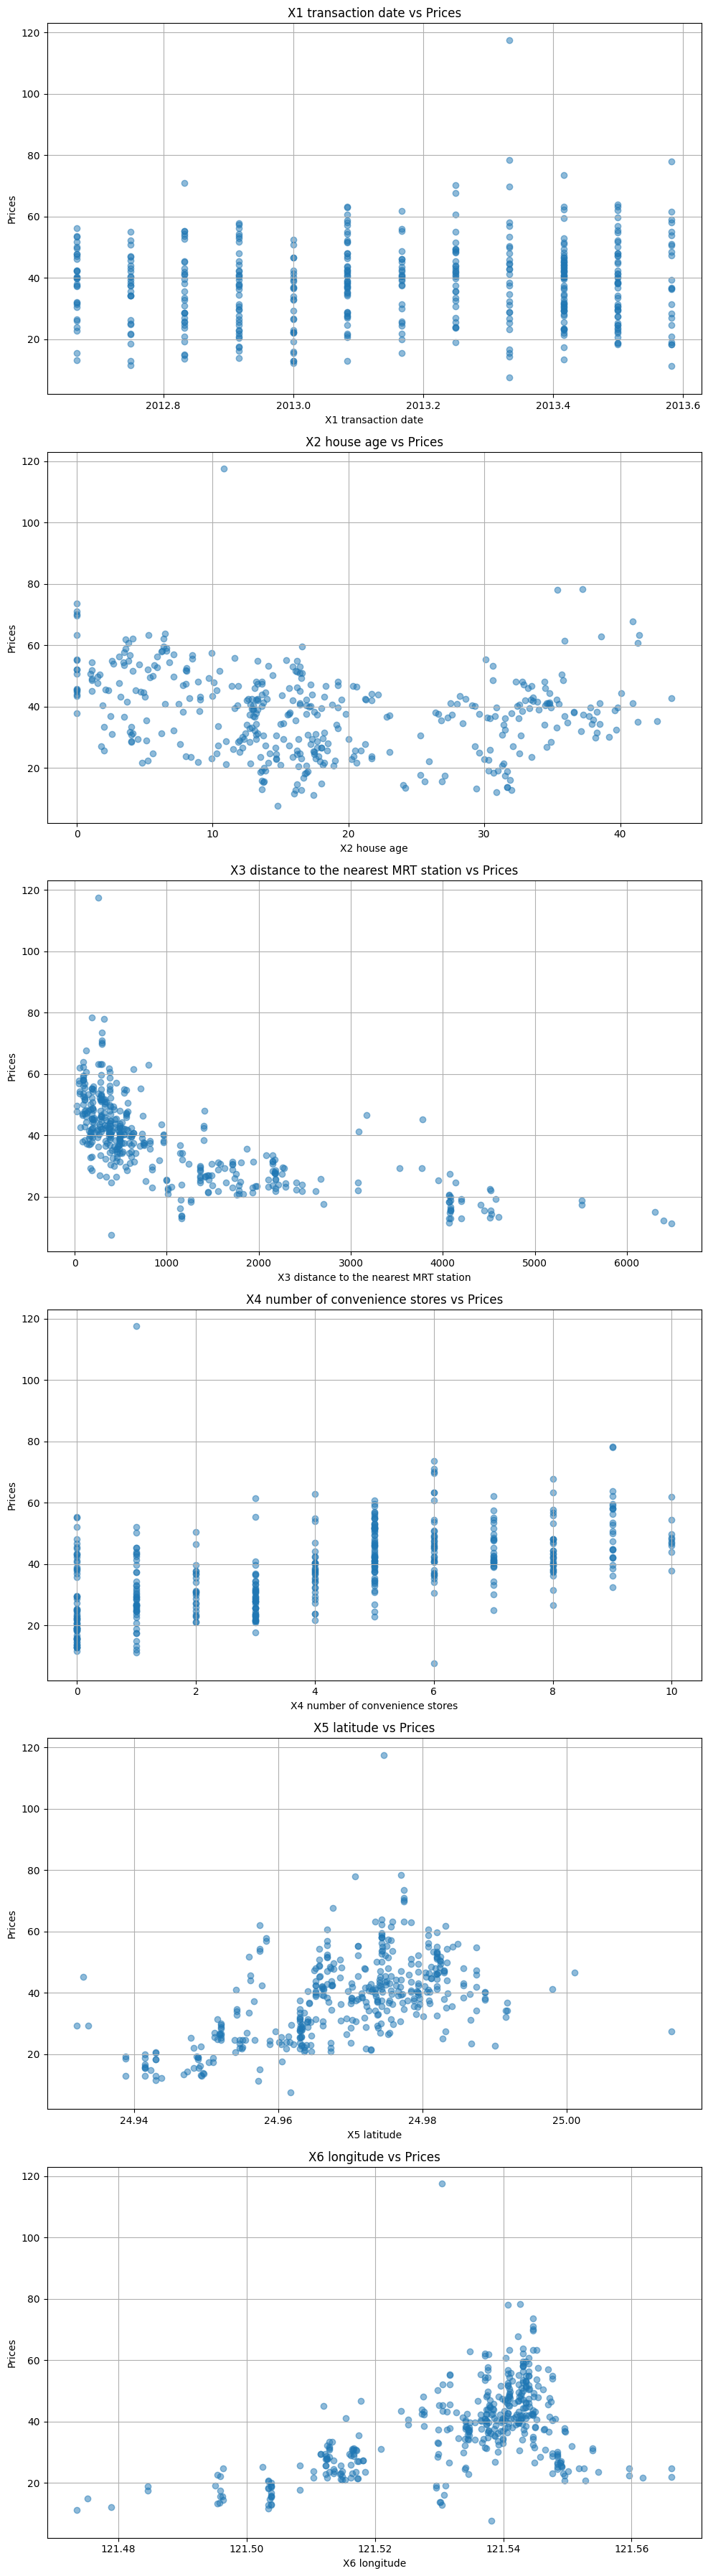

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = df.columns[1:-1]
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 6 * len(columns_to_plot)))

for i in range(len(columns_to_plot)):
    axes[i].scatter(df[columns_to_plot[i]], df['Y house price of unit area'], alpha=0.5)  # Scatter plot
    axes[i].set_xlabel(columns_to_plot[i])  # X-axis label
    axes[i].set_ylabel('Prices')  # Y-axis label
    axes[i].set_title(f'{columns_to_plot[i]} vs Prices')  # Plot title
    axes[i].grid(True)  # Show grid

plt.tight_layout()  # Adjust layout
plt.show()  # Show plot


In [5]:
y=df['Y house price of unit area']
df=df.drop(['No'],axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.25, random_state=42)
X_train=train.iloc[:,:-1].values
y_train=train.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values
print("Size of X_train:", X_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_test:", y_test.shape)

Size of X_train: (310, 6)
Size of y_train: (310,)
Size of X_test: (104, 6)
Size of y_test: (104,)


In [7]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_normalized = minmax_scaler.fit_transform(X_train)
X_test_normalized = minmax_scaler.transform(X_test)

In [8]:
y_train

array([ 62.1,  50. ,  31.3,  25.7,  37.5,  39. ,  34.1,  32.9,  49.3,
        57.1,  24.7,  55.3,  55. ,  53.3,  23.1,  29.5,  40.1,  45.1,
        70.1,  50.7,  37. ,  46.7,  29.3,  47.7,  19.2,  20.9,  29.4,
        39.1,  45.5,  38.1,  28.4,  31.5,  36.6,  31.9,  29.7,  17.7,
        37.4,  42.5,  54.4,  40.3,  59.6,  40.9,  40.2,  40.9,  42. ,
        25.6,  51.7,  22.9,  42.5,  36.3,  58.1,  43.5,  39.6,  42.4,
        39.4,  34.4,  38.1,  40.3,  46.1,  55.3,  39.4,  48.5,  41.4,
        15.6,  45.7,  36.8,  44. ,  63.3,  43.4,  27.3,  42.3,  19. ,
        55.9,  40.2,  25.3,  67.7,  55.5,  43.2,  40.6,  21.8,  42. ,
        45.5,  59.5,  40.1,  40. ,  34.6,  15. ,  36.2,  47.9,  25.3,
        28.4,  32.5,  46.6,  23.6,  56.8,  42.9,  21.7,  24.7,  12.9,
        19.2,  52.2,  48.6,  52.2,  44.5,  27. ,  52.5,  78.3,  47. ,
        36.7,  45.3,  41.6,  18.8,  43.8,  38.1,  38.4,  35.3,  41. ,
        47.7,  58.1,  45.4,  21.5,  44.8,  23.1,  42.6,  35.7,  24.8,
        30.9,  13. ,

In [9]:
lr_model = LinearRegression(0.01,2500)
lr_model.fit(X_train_normalized, y_train)
print(lr_model.predict(X_test_normalized))

[[46.60764396]
 [40.5655678 ]
 [38.18580941]
 [34.67445669]
 [26.67316208]
 [47.612832  ]
 [44.17093152]
 [46.06406915]
 [23.33976769]
 [54.99543703]
 [32.97119005]
 [34.68056692]
 [34.2497151 ]
 [22.83927091]
 [36.26108073]
 [32.21453214]
 [46.13714626]
 [43.8268918 ]
 [29.85661657]
 [45.72690093]
 [ 6.99518792]
 [33.36692474]
 [47.23448434]
 [46.18300167]
 [14.17114389]
 [34.18116643]
 [14.97914635]
 [36.72237731]
 [36.14630867]
 [39.02912076]
 [16.14457769]
 [36.80219775]
 [37.37858987]
 [31.15687905]
 [46.7431541 ]
 [29.37115942]
 [51.22787975]
 [16.30078017]
 [51.88433744]
 [43.10334321]
 [39.62166362]
 [40.22090548]
 [49.11198574]
 [35.38354437]
 [39.13957165]
 [47.54534438]
 [46.19623203]
 [29.61307886]
 [45.89163418]
 [47.47646921]
 [47.09350341]
 [48.07573286]
 [44.40615949]
 [44.16751132]
 [35.6794565 ]
 [17.25963484]
 [38.30999017]
 [37.42111846]
 [27.58872707]
 [45.57820969]
 [31.48008314]
 [30.12792425]
 [17.25963484]
 [11.39366646]
 [14.44408181]
 [32.40807007]
 [31.34522

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lr_model.predict(X_test_normalized))
print('Mean Squared Error:', mse)
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,lr_model.predict(X_test_normalized ))
print("R-squared error:", r_squared)

Mean Squared Error: 67.78565110915059
R-squared error: 0.5726500734262303


In [11]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test_normalized)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# 5. Print the MSE and R-squared scores
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r_squared)


Mean Squared Error (MSE): 144135496.13341367
R-squared (R^2) Score: -908691.2185065965


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

breast_cancer_data=load_breast_cancer()
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['target'] = breast_cancer_data.target

train,test = train_test_split(df, test_size=0.25, random_state=42)
X_train=train.iloc[:,:-1].values
y_train=train.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_normalized = minmax_scaler.fit_transform(X_train)
X_test_normalized = minmax_scaler.transform(X_test)

5. Write code for the sigmoid function and Logistic regression.


In [13]:
class sigmoid:
    def sigmoid(z):
        a=1.0/(1.0+ np.exp(-z))
        return a
    def derivative(self,z):
        return self.sigmoid(z)*(1-self.sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)

        for i in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)
            #cross-entropy loss function
            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples
            self.weights -= self.lr* dw
            self.bias-= self.lr* db

    def predict(self, X):
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1   
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
logreg.fit(X_train_normalized, y_train)
y_pred = logreg.predict(X_test_normalized)
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

model = LogisticRegression()  
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9790209790209791
[[52  2]
 [ 1 88]]
0.965034965034965
[[51  3]
 [ 2 87]]


c:\Users\Arsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [15]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=breast_cancer_data.target_names))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.96      0.97        54
      benign       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791
[[52  2]
 [ 1 88]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_csv('glass.csv')
df.tail(5)

train,test = train_test_split(df, test_size=0.25, random_state=42)
X_train=train.iloc[:,:-1].values
y_train=train.iloc[:,-1].values
X_test=test.iloc[:,:-1].values
y_test=test.iloc[:,-1].values

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [17]:
import numpy as np
from collections import Counter

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN(object):
    def __init__(self,k):
        self.k=k
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
        
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [18]:
# Use the Model
clf=KNN(k=4)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(accuracy(predictions,y_test))

0.7037037037037037


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy(predictions,y_test))

0.7037037037037037
